## Infinite Overlapping Mixture Model with Binary clusters

In [187]:
%load_ext autoreload
%autoreload 2
import utils, iomm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Synthetic Data

In [235]:
#Generate synthetic data
K=12
N=100
D=8
N_iter=200
alpha_prior = 4
burning_period=50

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [176]:
Z

array([[ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.]])

In [177]:
X

array([[ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.]])

In [178]:
theta

array([[  5.16776270e-04,   6.44825679e-01,   9.98108867e-01,
          6.18111997e-02,   6.13460709e-01,   7.50555867e-01],
       [  1.20304150e-01,   3.29842008e-01,   4.22718241e-01,
          2.76234391e-01,   5.20938192e-01,   1.48044061e-01],
       [  7.55648593e-01,   2.45444173e-01,   3.90374585e-01,
          7.58041310e-02,   5.27326643e-01,   1.79822370e-01],
       [  7.56023208e-02,   2.93885141e-01,   7.40886856e-01,
          3.22422961e-01,   2.53264490e-02,   4.14403432e-01],
       [  4.95397128e-01,   8.00168203e-01,   4.32245590e-01,
          2.06544417e-01,   7.05920182e-01,   5.58039376e-01],
       [  7.32409089e-02,   8.75466522e-01,   9.31601819e-01,
          2.99095218e-02,   6.31135589e-01,   3.83875854e-01]])

#### IOMM algorithm

In [236]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 30,
                 burning_period=burning_period)

In [237]:
%%capture
Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)

In [196]:
np.around(Z_hat_mean,0)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [195]:
Z_hat

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

In [197]:
Z

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

In [50]:
Z-Z_hat

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.]])

In [117]:
from matplotlib import pyplot as plt 
import numpy as np

In [118]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

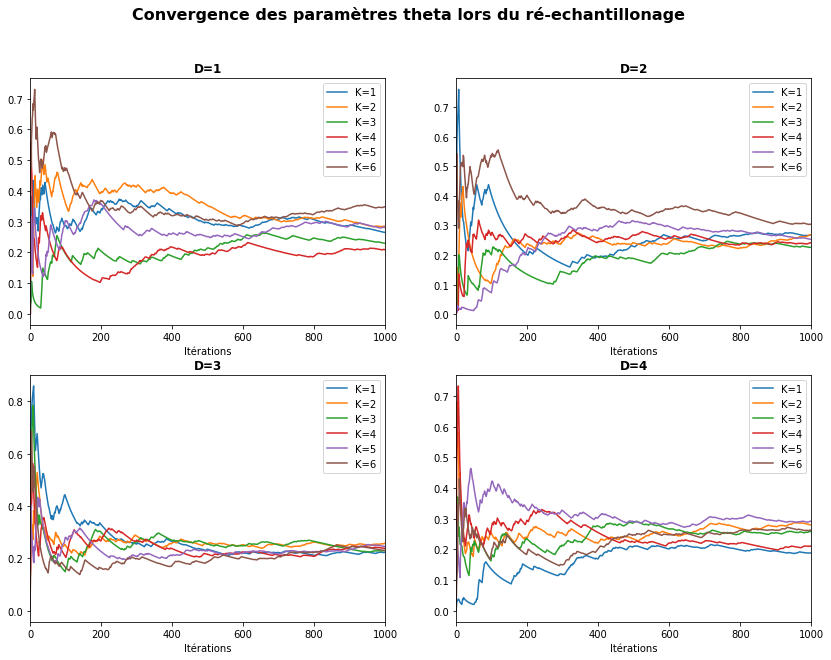

In [135]:
fig=plt.figure(figsize=(14,10))

for d in range(D-2):
    ax=fig.add_subplot(2,2,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
        plt.legend(["K=1","K=2","K=3","K=4","K=5","K=6"])
        plt.title("D="+str(d+1),fontweight='bold')
        plt.xlim(0,1000)
        plt.xlabel("Itérations")
plt.suptitle("Convergence des paramètres theta lors du ré-echantillonage",fontweight='bold',size=16)
plt.show()

In [238]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
#U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
print(np.around(U_hat))
U=np.dot(Z,Z.T)
#print(U)

[[ 1.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [239]:
print(np.sum(U_hat[35:,35:]))

52.46


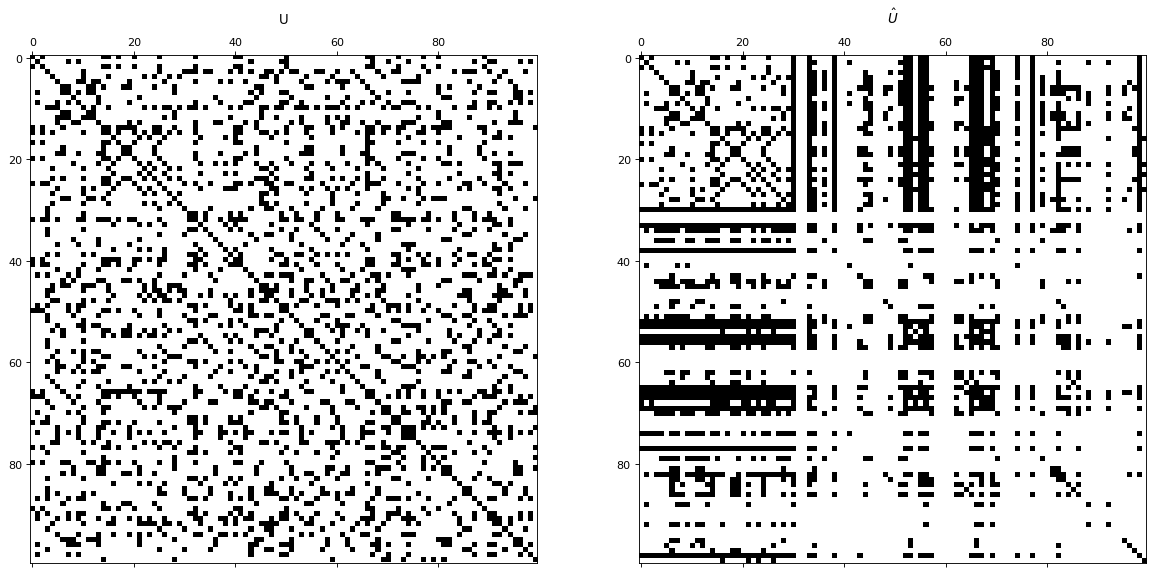

In [240]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [241]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff==0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.6262
% of pairs having at most 1 cluster difference: 0.9923
% of pairs having at most 2 clusters difference: 0.9995
% of pairs having at most 3 clusters difference: 1.0


In [ ]:
#TODO boxplot des U_diff

In [136]:
from scipy.stats import bernoulli

In [142]:
bernoulli.pmf(0,[0.3,0.9])

array([ 0.7,  0.1])